# Notæ 2

## Modelado de problemas de optimización sobre grafos

### Introducción


Muchos de los problemas de optimización que trabajamos en el grupo están directamente definidos sobre grafos o pueden modelarse mediante ellos. Por lo tanto, resulta indispensable aprender a construir grafos en python y escribir formulaciones de PLE basadas en ellos, es decir, donde las variables y restricciones dependan de los vértices/aristas.

### Construcción de grafos

Existentes dos enfoques en computación para representar un grafo: matrices de adyacencias y listas de adyacencias. Usaremos como ejemplo un grafo camino $P_3$ con conjunto de vértices $\{0,1,2\}$ y conjunto de aristas $\{(0,1),(1,2)\}$. Es decir:

$\bullet - \bullet - \bullet$<br>
$0 ~~~~ 1 ~~~~ 2$<br>

<b>Definición 1.</b> Dado un grafo $G$, la <i>matriz de adyacencias</i> $M(G)$ es una matriz binaria de dimensión $n \times n$, donde $n$ es el número de vértices, tal que la entrada $M(G)_{ij}=1$ si y sólo si $i$ y $j$ son adyacentes en $G$.

<b>Ejemplo.</b>
\begin{equation}
M(P_3) = \left(\begin{matrix}
0 & 1 & 0\\
1 & 0 & 1 \\
0 & 1 & 0\\
\end{matrix}\right)
\end{equation}

<b>Observación.</b> Si $G$ es simple, entonces $M(G)$ tiene todos 0s en su diagonal (ya que no tiene ciclos).

<b>Definición 2.</b> Dado un grafo $G$ y un vértice $v$ de $G$, la <i>lista de adyacencias</i> de $v$ es una lista $L_v(G)$ que contiene a todos los vecinos de $v$.

<b>Ejemplo.</b>
$$ L_0(P_3) = [1] $$
$$ L_1(P_3) = [0,2] $$
$$ L_2(P_3) = [2] $$

Estas dos representaciones tienen sus ventajas/desventajas. Por ejemplo:
* En la matriz de adyacencias es muy sencillo determinar si dos vértices $u$ y $v$ son adyacentes, pues simplemente hay que ver si $M(G)_{uv} = 1$. En cambio, con las listas de adyacencias esto es un poco más costoso, ya que necesitamos, por ejemplo, recorrer iterativamente $L_u(G)$ y determinar si contiene o no a $v$. 
* En las listas de adyacencias es muy sencillo saber el grado de un vértice $v$, simplemente es el cardinal de su lista de adyacencias, es decir, $|L_v(G)|$. En cambio, con la matriz de adyacencias es necesario iterar sobre la fila $v$ y contar cuantas entradas hay en 1.
* En general, almacenar la matriz de adyacencia puede ser muy costoso en memoria. Por ejemplo, un grafo de 10.000 vértices tiene una matriz de adyacencias con 100.000.000 entradas. Suponiendo que cada entrada ocupa 1 bit (un 0 o un 1), necesitaríamos 12.5 megabytes. En cambio, las listas de adyacencia suelen ser más eficiente en memoria, en particular cuando los grafos son poco densos.

Para poder manipular grafos en python, necesitaríamos elegir alguna de estas representaciones e implementar métodos que permitan realizar todo lo que se necesita habitualmente en teoría de grafos: obtener el número de vértices, el número de aristas, los grados de los vértices, decidir si dos vértices son adyacentes, etc... 

<b>¡¡Por suerte estamos en python!! &#x1f973;&#x1f973; </b>

No vamos a reinventar la rueda... En python existen muchos paquetes que nos permiten construir y manipular grafos de una forma (más o menos) sencilla. En nuestro caso vamos a usar uno llamado <code>networkx</code>, pero existen muchos otros... Incluso es posible vincular a python con <a href="https://doc.sagemath.org/html/en/reference/graphs/index.html">Sage</a> (software muy usado en teoría de grafos), aunque esto es un poco más complicado y preferimos no complicar las cosas.



### Paquete NetworkX

Lo primero que tenemos que hacer es descargar el paquete <code>networkx</code>. Los usuarios de Windows pueden hacer los siguientes pasos:
<p><code>
En la consola, ir al directorio “\Miniconda\Scripts” y ejecutar el siguiente comando para instalar
paquetes:
&gt; E:
&gt; cd \Miniconda\Scripts
&gt; pip install networkx
</code></p>

Los usuarios con distribuciones de Linux:
<p><code>
En la consola, ejecutar el siguiente comando para instalar paquetes:
&gt; python3 -m pip install networkx
</code></p>

En caso de error, probar abrir la consola en modo administrador (Windows) o anteponer el comando sudo (Linux).

Una vez hecho esto, deberíamos ser capaces de ejecutar la siguiente celda, encargada de importar el paquete <code>networkx</code> y de crear un alias un poco más corto para el mismo <code>nx</code>. Cada vez que escribamos <code>nx</code>, python sabrá que nos estamos refiriendo al paquete <code>networkx</code>.

In [3]:
import networkx as nx

Construir grafos en este paquete es muy sencillo. Usemos a $P_3$ como ejemplo. Primero iniciamos un grafo vacío llamando al constructor de la clase <code>Graph</code> y guardamos el objeto resultante en una variable de python de nombre <code>G</code>.

In [4]:
G = nx.Graph()

Vamos agregando una a una las aristas mediante el método <code>add_edge(u,v)</code> de la clase <code>Graph</code>, donde <code>u</code> y <code>v</code> son los extremos de cada arista. Notar que este método también se ocupa de agregar los vértices correspondientes en caso de que no existan.

In [5]:
G.add_edge(0,1)
G.add_edge(1,2)

Podemos imprimir un resumen del grafo mediante la función <code>print()</code> de python:

In [6]:
print(G)

Graph with 3 nodes and 2 edges


En grafos chicos, también será muy útil poder verlos gráficamente. Por suerte, el paquete tiene funciones para esto. La función <code>draw(G)</code> de <code>networkx</code> nos permitirá graficar un grafo <code>G</code>:

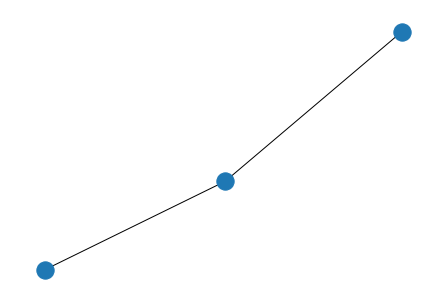

In [7]:
nx.draw(G)

En caso de necesitar el nombre de los vértices, podemos usar la función <code>draw_networkx(G)</code> de <code>networkx</code>:

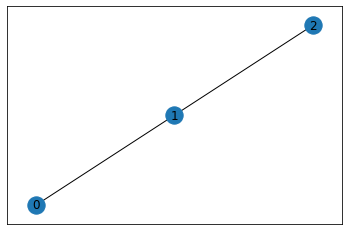

In [11]:
nx.draw_networkx(G)

¿Y si nuestro grafo tiene vértices aislados? Bueno, para estos casos existe el método <code>add_node(v)</code> de la clase <code>Graph</code>, donde <code>v</code> es el vértice a agregar. Por ejemplo, agreguemos un vértice aislado a $P_3$ de nombre 3:

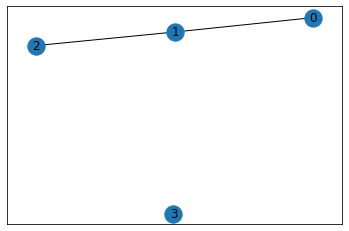

In [12]:
G.add_node(3)
nx.draw_networkx(G)

Por supuesto también tenemos métodos para remover vértices y aristas, <code>remove_node(v)</code> y <code>remove_edge(u,v)</code> de la clase <code>Graph</code>, respectivamente. Por ejemplo, borremos el vértice que acabamos de agregar:

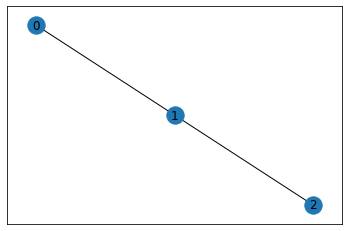

In [13]:
G.remove_node(3)
nx.draw_networkx(G)

También es posible construir un grafo en una única línea, mediante el método <code>add_edges_from(aristas)</code> de la clase <code>Graph</code>, donde <code>aristas</code> es una lista con las aristas del grafo. Para poder reutilizar la variable de python <code>G</code>, previamente tenemos que limpiar el grafo anterior mediante el método <code>clear()</code> de la clase <code>Graph</code>, de lo contrario podemos reinsertar aristas.

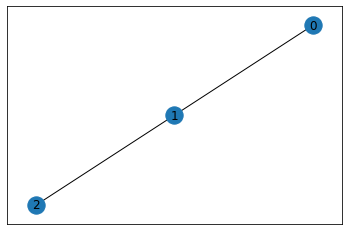

In [17]:
G.clear()
G.add_edges_from([(0,1),(1,2)])
nx.draw_networkx(G)

### &#x1f4bb; Actividad 1 

Construir el grafo <a href="https://mathworld.wolfram.com/SunGraph.html">3-sol (figura de la izquierda)</a>.

In [69]:
# Celda para resolver la actividad 1

### Generadores de grafos 

El paquete <code>networkx</code> nos ofrece una gran cantidad de funciones predefinidas para generar grafos particulares, con nombre y apellido. Veamos algunos ejemplos.

La función <code>path_graph(n)</code> nos permite construir un camino de $n$ vértices:

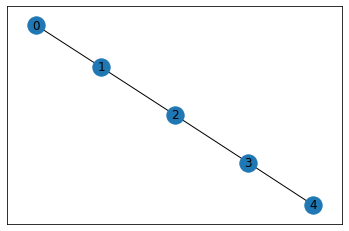

In [24]:
P5 = nx.path_graph(5)
nx.draw_networkx(P5)

La función <code>complete_graph(n)</code> nos permite construir un completo de $n$ vértices:

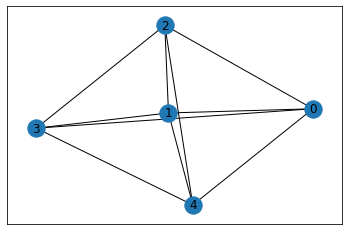

In [25]:
K5 = nx.complete_graph(5)
nx.draw_networkx(K5)

La función <code>cycle_graph(n)</code> nos permite construir un ciclo de $n$ vértices:

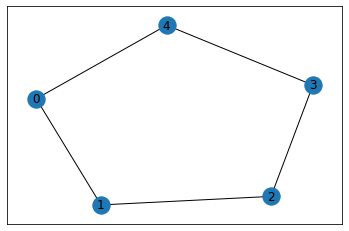

In [26]:
C5 = nx.cycle_graph(5)
nx.draw_networkx(C5)

La función <code>star_graph(n)</code> nos permite construir una estrella de $n+1$ vértices:

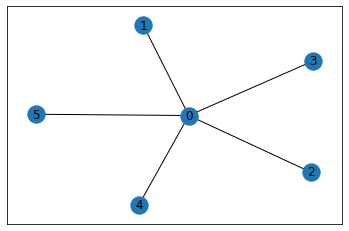

In [31]:
S5 = nx.star_graph(5)
nx.draw_networkx(S5)

La función <code>petersen_graph(n)</code> nos permite construir el grafo de petersen:

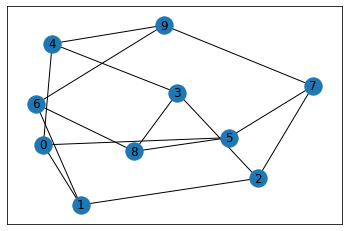

In [34]:
Petersen = nx.petersen_graph()
nx.draw_networkx(Petersen)

La función <code>line_graph(G)</code> nos permite construir el grafo de linea de un grafo <code>G</code>. Por ejemplo, el grafo de línea del grafo 5-estrella:

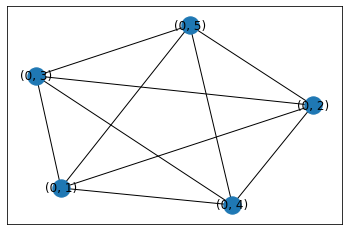

In [35]:
LS5 = nx.line_graph(S5)
nx.draw_networkx(LS5)

Etc, etc, etc... Tenemos infinidad de generadores ya predefinidos. Siempre es recomendable revisar el listado de <a href="https://networkx.org/documentation/stable/reference/generators.html">generadores</a> antes de construir un grafo por nuestros propios medios. 

### Funciones

Ya sabemos generar grafos, pero falta averiguar qué podemos hacer con ellos. Usaremos como ejemplo un grafo aleatorio. Los grafos aleatorios son muy útiles para evaluar algoritmos sobre entradas sin ninguna estructura particular. El paquete <code>networkx</code> nos ofrece la función <code>erdos_renyi_graph(n,p)</code> para generar un grafo aleatorio con $n$ vértices y densidad (apróximadamente) $p$. Internamente, esta función comienza con un grafo sin aristas con $n$ vértices y agrega con probabilidad $p$ una arista entre todo par de vértices. 

A continuación generamos y graficamos un grafo aleatorio con 10 vértices y probabilidad de arista 0.8, y lo almacenamos en una variable de python de nombre <code>R</code>. El parámetro <code>seed=0</code> nos garantiza que múltiples ejecuciones de esa celda, generarán exactamente el mismo grafo.

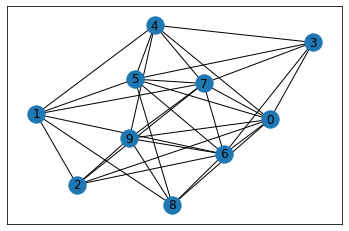

In [39]:
R = nx.erdos_renyi_graph(10,0.8,seed=0)
nx.draw_networkx(R)

#### Número de vértices, aristas, densidad, grados y adyacencias

La clase <code>Graph</code> nos provee de los métodos <code>number_of_nodes()</code> y <code>number_of_edges()</code> para saber el número de vértices y aristas, respectivamente, del grafo.

In [46]:
R.number_of_nodes()

10

In [47]:
R.number_of_edges()

32

También nos provee la función <code>density(G)</code> para conocer la densidad del grafo $G$ (es decir, el cociente entre el número de aristas de $G$ y el número de aristas que posee un grafo completo con la misma cantidad de vértices). En los casos extremos una densidad de 0 represeta un grafo sin aristas, y una densidad de 1 a un grafo completo. Observar que la densidad es aproximdamente igual a la probabilidad de arista que usamos para la generación, y estos valores tenderán a coincidir a medida que aumentamos el tamaño del grafo.

In [45]:
nx.density(R)

0.7111111111111111

El método <code>degree(v)</code> de la clase <code>Graph</code> nos devuelve el grado del vértice $v$. Por ejemplo, para el vértice 0 tenemos:

In [49]:
R.degree(0)

8

También será util saber si dos vértices son o no adyacentes. Disponemos del método <code>has_edge(u,v)</code> de la clase <code>Graph</code> que determina si $u$ y $v$ son adyacentes. Por ejemplo:

In [50]:
R.has_edge(0,1)

False

In [51]:
R.has_edge(0,2)

True

#### Iteradores

En muchas situaciones, al programar es necesario iterar sobre los vértices del grafo. Por ejemplo, supongamos que queremos escribir una función que determine si algún vértice tiene grado mayor a un número dado $k$. Esto es muy sencillo, podemos iterar sobre los vértices de la siguiente forma:
<p><code>for v in R:
    ...</code></p>
   
Es decir, <code>v</code> es una variable de python que almacenará el vértice en cada iteración del bucle y <code>R</code> es el nombre del grafo que habíamos generado anteriormente. Por ejemplo, supongamos que simplemente queremos recorrer todos los vértices e imprimirlos:

In [70]:
for v in R:
    print(v)

0
1
2
3
4
5
6
7
8
9


Con esta idea, podemos escribir la función que buscabamos de la siguiente forma:

In [76]:
def tiene_grado_mayor_a(G,k):
    for v in G:
        if G.degree(v) > k:
            return True
    return False

Para testear esta función, podemos aplicarla sobre nuestro grafo <code>R</code> previamente construido:

In [77]:
tiene_grado_mayor_a(R,2)

True

Por el contrario, si pedimos un grado demasiado alto:

In [78]:
tiene_grado_mayor_a(R,9)

False

También es posible iterar sobre los vecinos de un vértice $v$, mediante el método <code>neighbors(v)</code> de la clase <code>Graph</code>. Por ejemplo, iteremos sobre los vecinos de 0 e imprimámoslos uno por uno.

In [74]:
for v in R.neighbors(0):
    print(v)

2
3
4
5
6
7
8
9


Finalmente, también es posible iterar sobre las aristas del grafo. Esto se hace de la siguiente forma:
<p><code>for u,v in R.edges:
    ...</code></p>

Es decir, <code>u</code> y <code>v</code> son variables de python que almacenarán los extremos de la arista en cada iteración del bucle y <code>R.edges</code> es la lista con todas las aristas del grafo anterior. Por ejemplo, supongamos que simplemente queremos recorrer todas las aristas e imprimirlas:

In [68]:
for u,v in R.edges:
    print(u,v)

0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 2
1 4
1 5
1 6
1 7
1 8
2 6
2 7
2 9
3 4
3 5
3 6
3 7
4 5
4 7
4 9
5 6
5 7
5 8
6 7
6 8
6 9
7 9
8 9


### &#x1f4bb; Actividad 2

Escribir una función que tome un grafo $G$ y determine si es euleriano, es decir, si existe un circuito que pase exactamente una vez por cada una de sus aristas. Recordar que un grafo $G$ es euleriano si y solo si todos sus vértices tiene grado par.

In [85]:
# Celda para completar la actividad 2

# Función que determina si un número es par
def es_par(n):
    return (n % 2) == 0 # Tiene resto 0 en la division por 2? 

def es_euleriano(G):
    # COMPLETAR
    return False

### Algoritmos

Ya hemos visto las funciones básicas de <code>networkx</code>, mediante las cuales podremos construir todo lo que necesitaremos en el curso. Sin embargo, muchos algoritmos que usamos habitualmente en teoría de grafos ya se encuentran implementados en este paquete, lo que nos ahorrará mucho tiempo.

Volviendo a la actividad anterior, disponemos de una función <code>is_eulerian(G)</code> que determina si un grafo $G$ tiene un ciclo euleriano. Por ejemplo, para el grafo de petersen generado más arriba:

In [97]:
nx.is_eulerian(Petersen)

False

Y para el ciclo de 5 vérticeS:

In [98]:
nx.is_eulerian(C5)

True

Además, le podemos pedir que nos devuelva explícitamente el circuito euleriano mediante la función <code>eulerian_circuit(G)</code>. Por ejemplo, en el completo de 5 vértices generado más arriba:

In [99]:
list(nx.eulerian_circuit(K5))

[(0, 4),
 (4, 3),
 (3, 2),
 (2, 4),
 (4, 1),
 (1, 3),
 (3, 0),
 (0, 2),
 (2, 1),
 (1, 0)]

Otro ejemplo, es la función <code>dominating_set(G)</code> que devuelve un conjunto dominante de $G$. Por ejemplo, en el grafo de petersen:

In [100]:
nx.dominating_set(Petersen)

{0, 2, 6}

Obviamente sería imposible abarcar en este notebook todos los algoritmos que <code>networkx</code> trae predefinidos. La sugerencia siempre es mirar el listado de <a href="https://networkx.org/documentation/stable/reference/algorithms/index.html">algoritmos</a> disponibles antes de programar uno por nuestra cuenta.